In [73]:
import pandas as pd
import re

In [68]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
path = './data/data_with_segment.xlsx'
df = pd.read_excel(path)
df.shape

(3629, 30)

In [23]:
df_copy = df.copy(deep=True)
df_copy.shape

(3629, 30)

In [74]:
# 处理时间序列(去除序列两端的非法值)
def handle_series(s):
    try:
        s = str(s)
        series = re.split(r'\s+',s.strip())
        length = len(series)
        if length == 1:
            return '0'
        l = 0
        r = length - 1
        # 从左边找到第一个合法数字的索引
        while l < length:
            if not re.match(r'^[-]?[0-9.]+$',series[l]):
                l = l + 1
            else:
                if float(series[l]) <= 0:
                    l = l + 1
                else:
                    break
        # 从右边边找到第一个合法数字的索引
        while r > 0:
            if not re.match(r'^[-]?[0-9.]+$',series[r]):
                r = r - 1
            else:
                if float(series[r]) <= 0:
                    r = r - 1
                else:
                    break
        if l >= r:
            return '0'
        else:
            return ' '.join(series[l:r+1])
    except:
        print(s)

In [77]:
df_copy['T1'].apply(handle_series)

0                                                       0
1                                                       0
2       21 21 21 21 21 21.1 21.1 -102 -102 -999 21.2 2...
3                                                       0
4                                                       0
                              ...                        
3624    23.3 23.3 23.3 23.3 23.3 23.3 23.3 23.4 23.3 2...
3625                                                    0
3626    23.2 23.1 23.1 23 23 23 23 23 23 23 22.9 22.9 ...
3627                                                    0
3628                                                    0
Name: T1, Length: 3629, dtype: object

In [78]:
def fix_time_series(df):
    print(df.shape[0])
    cols = ['ART2DIA','ART2MEAN','ART2SYS','ARTDIA','ARTMEAN','ARTSYS',
           'BIS','CVP','EtCO2','HR','NBPDIA','NBPMEAN',
           'NBPSYS','PR','RR','SPO2','T1','T2']
    for col in cols:
        print(col)
        df[col] = df[col].apply(handle_series)
        print(col + ':' + str(len(df[col])))

In [79]:
fix_time_series(df_copy)

3629
ART2DIA
ART2DIA:3629
ART2MEAN
ART2MEAN:3629
ART2SYS
ART2SYS:3629
ARTDIA
ARTDIA:3629
ARTMEAN
ARTMEAN:3629
ARTSYS
ARTSYS:3629
BIS
BIS:3629
CVP
CVP:3629
EtCO2
EtCO2:3629
HR
HR:3629
NBPDIA
NBPDIA:3629
NBPMEAN
NBPMEAN:3629
NBPSYS
NBPSYS:3629
PR
PR:3629
RR
RR:3629
SPO2
SPO2:3629
T1
T1:3629
T2
T2:3629


In [80]:
df_copy.to_excel('./data/data_with_time_series.xlsx')

In [70]:
df_operation_time = df['BIS'].apply(lambda s:len(re.split(r'\s+',str(s))) * 30 / 3600)

In [71]:
df_operation_time

0       1.808333
1       4.758333
2       6.650000
3       3.958333
4       2.875000
          ...   
3624    0.625000
3625    1.225000
3626    1.908333
3627    1.925000
3628    2.266667
Name: BIS, Length: 3629, dtype: float64

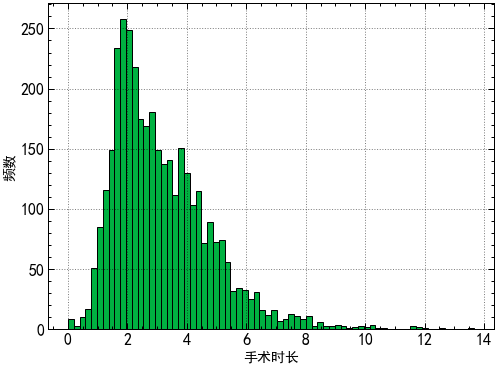

In [72]:
with plt.style.context(['science','grid','notebook']):
    plt.figure(figsize=(8,6))
    plt.hist(df_operation_time, bins=70, density=False,edgecolor="black",color='#00b141')
    
    plt.ylabel('频数',fontdict={'size':14})
    plt.xlabel('手术时长',fontdict={'size':14})

    plt.show()